In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import tempmatch as tm
import obspy

import helpers

In [2]:
filelocs = !ls /media/sda/data/robdata/tremors/*.mseed

In [3]:
stream = obspy.read(filelocs[0])
for f in filelocs[1:]:
    stream = stream + obspy.read(f)

In [5]:
stream.merge()

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.02.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.03.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.898000Z | 10.0 Hz, 240304060 samples (masked)
7F.B00.04.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.05.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.06.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.898000Z | 10.0 Hz, 240304060 samples (masked)

In [7]:
stream.write('/media/sda/data/robdata/tremors/alldata.mseed', type='MSEED')

NotImplementedError: Masked array writing is not supported. You can use np.array.filled() to convert the masked array to a normal array.

In [9]:
h1 = stream[0].copy()

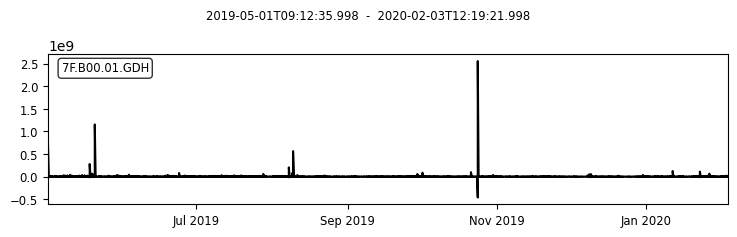

In [12]:
x = h1.plot()

In [ ]:
y = h1.data
y = y.cumsum()

In [16]:
detectfiles = !ls /media/sda/data/borehole/detections/*.csv

In [18]:
from make_stds_b00 import *

bubble = read_csvs_convert_to_dataframe(detectfiles)
bubble['time'] = pd.to_datetime(bubble['time'])
bubble.sort_values(by='time', inplace=True)
bubble['ones'] = 1
bubble.set_index('time', inplace=True)

NameError: name 'read_csvs_convert_to_dataframe' is not defined

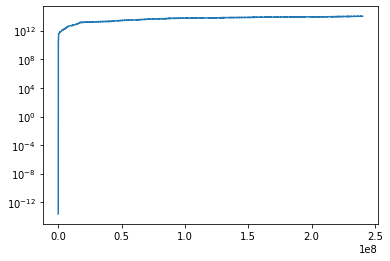

In [15]:
fig, ax = plt.subplots()

ax.plot(y)
# ax.set_yscale('log')

# fig, ax = plt.subplots(figsize=(15, 5))

df['cumsum'].plot(ax=ax, color='dodgerblue')
ax2 = ax.twinx()
bubble.ones.cumsum().plot(ax=ax2, color='red')
# ax.set_yscale('log')